In [1]:
from sportsreference.nfl.teams import Teams
import pandas as pd
import numpy as np
from scipy import stats

teams = Teams(year= '2020')
teams_df = teams.dataframes
teams_df.set_index('name', inplace=True)
teams_df.drop(['first_downs', 'first_downs_from_penalties',  'games_played','losses', 'abbreviation','pass_attempts', 'pass_completions', 'pass_first_downs','plays', 'points_contributed_by_offense','post_season_result', 'rush_attempts', 'rush_first_downs', 'wins'], axis=1, inplace= True)
#stats.zscore(teams_df, axis =1, nan_policy="omit")
print(list(teams_df.columns))
for (columnName, columnData) in teams_df.iteritems(): 
    if columnName != 'name':
        teams_df[columnName] = stats.zscore(columnData)
teams_df['fumbles'] *= -1
teams_df['interceptions'] *= -1
teams_df['penalties'] *= -1
teams_df['percent_drives_with_turnovers'] *= -1
teams_df['points_against'] *= -1
teams_df['turnovers'] *= -1
teams_df['yards_from_penalties'] *= -1
print(teams_df.head())
#print(list(teams_df.columns))

['defensive_simple_rating_system', 'fumbles', 'interceptions', 'margin_of_victory', 'offensive_simple_rating_system', 'pass_net_yards_per_attempt', 'pass_touchdowns', 'pass_yards', 'penalties', 'percent_drives_with_points', 'percent_drives_with_turnovers', 'points_against', 'points_difference', 'points_for', 'rank', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'simple_rating_system', 'strength_of_schedule', 'turnovers', 'win_percentage', 'yards', 'yards_from_penalties', 'yards_per_play']
                      defensive_simple_rating_system   fumbles  interceptions  \
name                                                                            
Green Bay Packers                           0.535878  0.818382       1.938577   
Buffalo Bills                               0.179862 -0.860350       0.354718   
Tampa Bay Buccaneers                        0.832557  1.154128       0.090742   
Tennessee Titans                           -0.917853  1.154128       1.410624   
New Orl

In [2]:
rank = pd.Series()
rank['defensive_simple_rating_system'] = 5
rank['fumbles'] =0
rank['interceptions'] =0
rank['margin_of_victory'] = 3
rank['offensive_simple_rating_system'] = 5
rank['pass_net_yards_per_attempt'] = .5
rank['pass_touchdowns'] = 1
rank['pass_yards'] =1
rank['penalties'] =1
rank['percent_drives_with_points'] =2
rank['percent_drives_with_turnovers'] = 2
rank['points_against'] =1
rank['rank'] = 0
rank['rush_touchdowns'] = 1
rank['rush_yards'] = 3
rank['rush_yards_per_attempt'] =1
rank['simple_rating_system'] = 7
rank['strength_of_schedule'] = 4
rank['turnovers'] = 3
rank['win_percentage'] = 6
rank['yards'] = 2
rank['yards_from_penalties'] = .5
rank['yards_per_play'] = 2  
sum = rank.sum() 
rank/=sum

In [3]:
for (columnName, columnData) in rank.iteritems(): 
    teams_df[columnName]*= columnData
    print(rank[columnName])

0.09803921568627451
0.0
0.0
0.058823529411764705
0.09803921568627451
0.00980392156862745
0.0196078431372549
0.0196078431372549
0.0196078431372549
0.0392156862745098
0.0392156862745098
0.0196078431372549
0.0
0.0196078431372549
0.058823529411764705
0.0196078431372549
0.13725490196078433
0.0784313725490196
0.058823529411764705
0.11764705882352941
0.0392156862745098
0.00980392156862745
0.0392156862745098


In [4]:
teams_df['sum'] = 0.0
for i, row in teams_df.iterrows():
    teams_df.at[i, 'sum'] = row['defensive_simple_rating_system':].sum()
teams_df.sort_values(by=['sum'], inplace=True, ascending=False)
print(teams_df['sum'])

name
Green Bay Packers           4.148443
New Orleans Saints          3.728497
Tampa Bay Buccaneers        3.709025
Buffalo Bills               3.553107
Baltimore Ravens            3.529017
Kansas City Chiefs          3.150442
Tennessee Titans            2.538488
Seattle Seahawks            2.461047
Indianapolis Colts          2.036179
Pittsburgh Steelers         1.574587
Miami Dolphins              0.914919
Arizona Cardinals           0.867783
Los Angeles Rams            0.845463
Cleveland Browns            0.089813
Minnesota Vikings           0.053471
Las Vegas Raiders          -0.000880
Atlanta Falcons            -0.171198
Chicago Bears              -0.500828
San Francisco 49ers        -0.523119
Los Angeles Chargers       -0.766915
New England Patriots       -1.326378
Washington Football Team   -1.327965
Carolina Panthers          -1.354314
Houston Texans             -1.362336
Dallas Cowboys             -1.396012
Detroit Lions              -2.356178
Philadelphia Eagles        -2.471

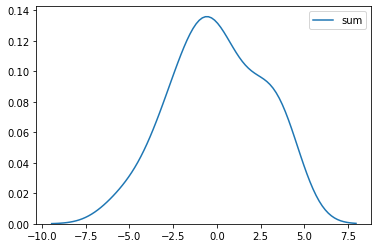

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(teams_df['sum'])



In [6]:
teams_df['zscores'] = stats.zscore(teams_df['sum'])
teams_df['percentile'] =  1- stats.norm.sf(teams_df['zscores'])
print(teams_df['percentile'])

name
Green Bay Packers           0.949102
New Orleans Saints          0.929297
Tampa Bay Buccaneers        0.928252
Buffalo Bills               0.919453
Baltimore Ravens            0.918024
Kansas City Chiefs          0.892990
Tennessee Titans            0.841640
Seattle Seahawks            0.834145
Indianapolis Colts          0.789042
Pittsburgh Steelers         0.732714
Miami Dolphins              0.640897
Arizona Cardinals           0.633925
Los Angeles Rams            0.630608
Cleveland Browns            0.514129
Minnesota Vikings           0.508413
Las Vegas Raiders           0.499862
Atlanta Falcons             0.473083
Chicago Bears               0.421705
San Francisco 49ers         0.418268
Los Angeles Chargers        0.381142
New England Patriots        0.300437
Washington Football Team    0.300219
Carolina Panthers           0.296614
Houston Texans              0.295521
Dallas Cowboys              0.290951
Detroit Lions               0.176363
Philadelphia Eagles         0.164

In [7]:
def predict (team1, team2):
    t1 = teams_df['percentile'].loc[team1]
    t2 = teams_df['percentile'].loc[team2]
    #return (teams_df['percentile'].loc[team1] - teams_df['percentile'].loc[team2])/2 + .5
    p = 1/(10**(-(t1 - t2))+1)
    return probToMoneyLine(p)

In [8]:
def probToMoneyLine (prob):
    ml = 0
    prob*=100
    if prob >50:
        ml = -(prob/(100 - prob)) * 100
    elif prob < 50:
        ml = (((100 - prob)/prob) * 100)
    else:
        ml = 100
    return ml

In [9]:
predict('Tennessee Titans', 'Las Vegas Raiders')

-219.67379870334616

In [10]:
import json
import requests
import argparse

parser = argparse.ArgumentParser(description='Sample')
parser.add_argument('--api-key', type=str, default='')
args, unknown = parser.parse_known_args()


API_KEY = '58f860df380e5b01f108f9418584b714'

SPORT = 'americanfootball_nfl' # use the sport_key from the /sports endpoint below, or use 'upcoming' to see the next 8 games across all sports

REGION = 'us' # uk | us | eu | au

MARKET = 'h2h' # h2h | spreads | totals

ODDSFORMAT  = 'american'



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#
# Now get a list of live & upcoming games for the sport you want, along with odds for different bookmakers
#
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

odds_response = requests.get('https://api.the-odds-api.com/v3/odds', params={
    'api_key': API_KEY,
    'sport': SPORT,
    'region': REGION,
    'mkt': MARKET,
    'oddsFormat': ODDSFORMAT,
})

odds_json = json.loads(odds_response.text)
games = []
if not odds_json['success']:
    print(odds_json['msg'])
else:
    print('Number of events:', len(odds_json['data']))
    # print(odds_json['data'])
    for i, game in enumerate(odds_json['data'], start=0):
        games.append({})
        games[i]['teams'] = game['teams']
        games[i]['home'] = game['home_team']

        for site in game['sites']:
            if site['site_nice'] == 'Caesars':
                games[i]['odds'] = site['odds']['h2h']

    # Check your usage
    print('Remaining requests', odds_response.headers['x-requests-remaining'])
    print('Used requests', odds_response.headers['x-requests-used'])

Number of events: 0
Remaining requests 500
Used requests 0


In [11]:
print(games)

[]


In [12]:
for game in games:
    team1 = game['teams'][0]
    team2 = game['teams'][1]
    print(team1, ' vs', team2)
    print('Predicted Line for', team1,'is', predict(team1, team2))
    print('Actual Line for', team1,'is', game['odds'][0] )
